# LIAB's exploratory data analysis

Inspired by Fred Navursoz's Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Read Data

In [3]:
aisles = pd.read_csv('./data/aisles.csv')

departments = pd.read_csv('./data/departments.csv')

products = pd.read_csv('./data/products.csv', engine='c')

order_products_prior = pd.read_csv('./data/order_products__prior.csv', engine='c', 
                       dtype={'order_id': np.int32, 'product_id': np.int32, 
                              'add_to_cart_order': np.int16, 'reordered': np.int8})

order_products_train = pd.read_csv('./data/order_products__train.csv', engine='c', 
                       dtype={'order_id': np.int32, 'product_id': np.int32, 
                              'add_to_cart_order': np.int16, 'reordered': np.int8})

orders = pd.read_csv('./data/orders.csv', engine='c', dtype={'order_id': np.int32, 
                                                           'user_id': np.int32, 
                                                           'order_number': np.int32, 
                                                           'order_dow': np.int8, 
                                                           'order_hour_of_day': np.int8, 
                                                           'days_since_prior_order': np.float16})

sample_submission = pd.read_csv('./data/sample_submission.csv', engine='c')

## Aisle, product, and department previews:

In [4]:
# aisles.csv
print('aisles.csv')
print('Total: {}'.format(aisles.shape[0]))
aisles.head()

aisles.csv
Total: 134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
# products.csv
print('products.csv')
print('Total: {}'.format(products.shape[0]))
products.head()

products.csv
Total: 49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
# departments.csv
print('departments.csv')
print('Total products: {}'.format(departments.shape[0]))
departments.head()

departments.csv
Total products: 21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


# Group together product related information into new DataFrame labeled 'goods'

In [7]:
goods = pd.merge(left=pd.merge(left=products, right=departments, how='left'), right=aisles, how='left')
# Make product names more pythonic ;)
goods.product_name = goods.product_name.str.replace(' ', '_').str.lower()
goods.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,chocolate_sandwich_cookies,61,19,snacks,cookies cakes
1,2,all-seasons_salt,104,13,pantry,spices seasonings
2,3,robust_golden_unsweetened_oolong_tea,94,7,beverages,tea
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1,frozen,frozen meals
4,5,green_chile_anytime_sauce,5,13,pantry,marinades meat preparation


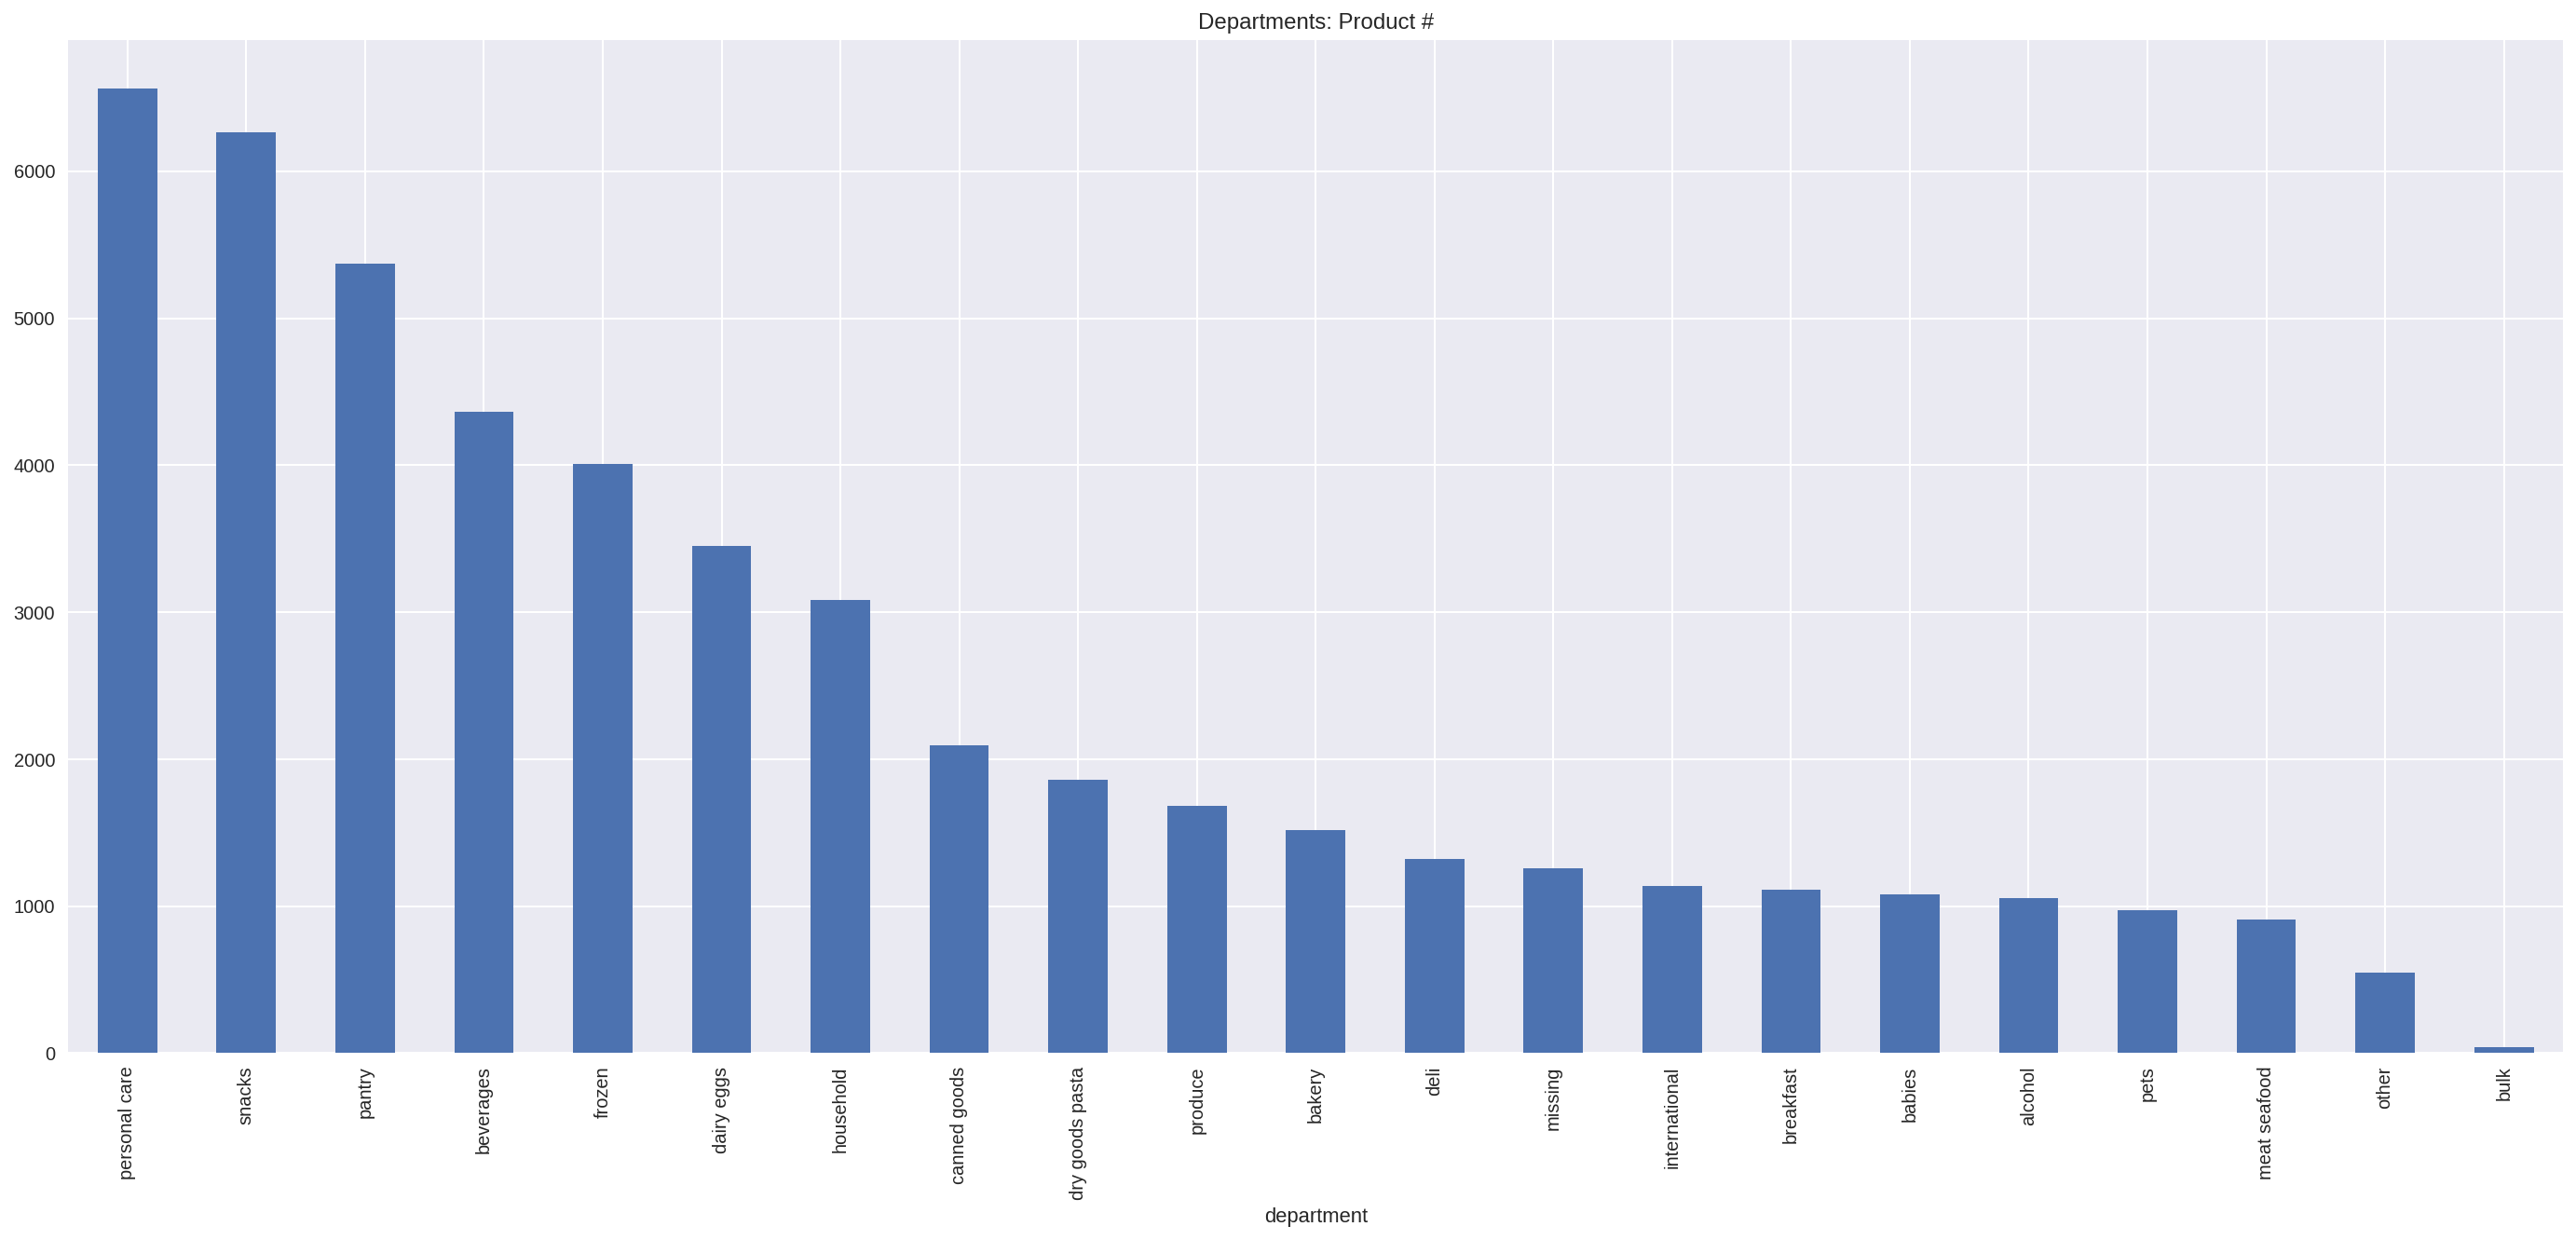

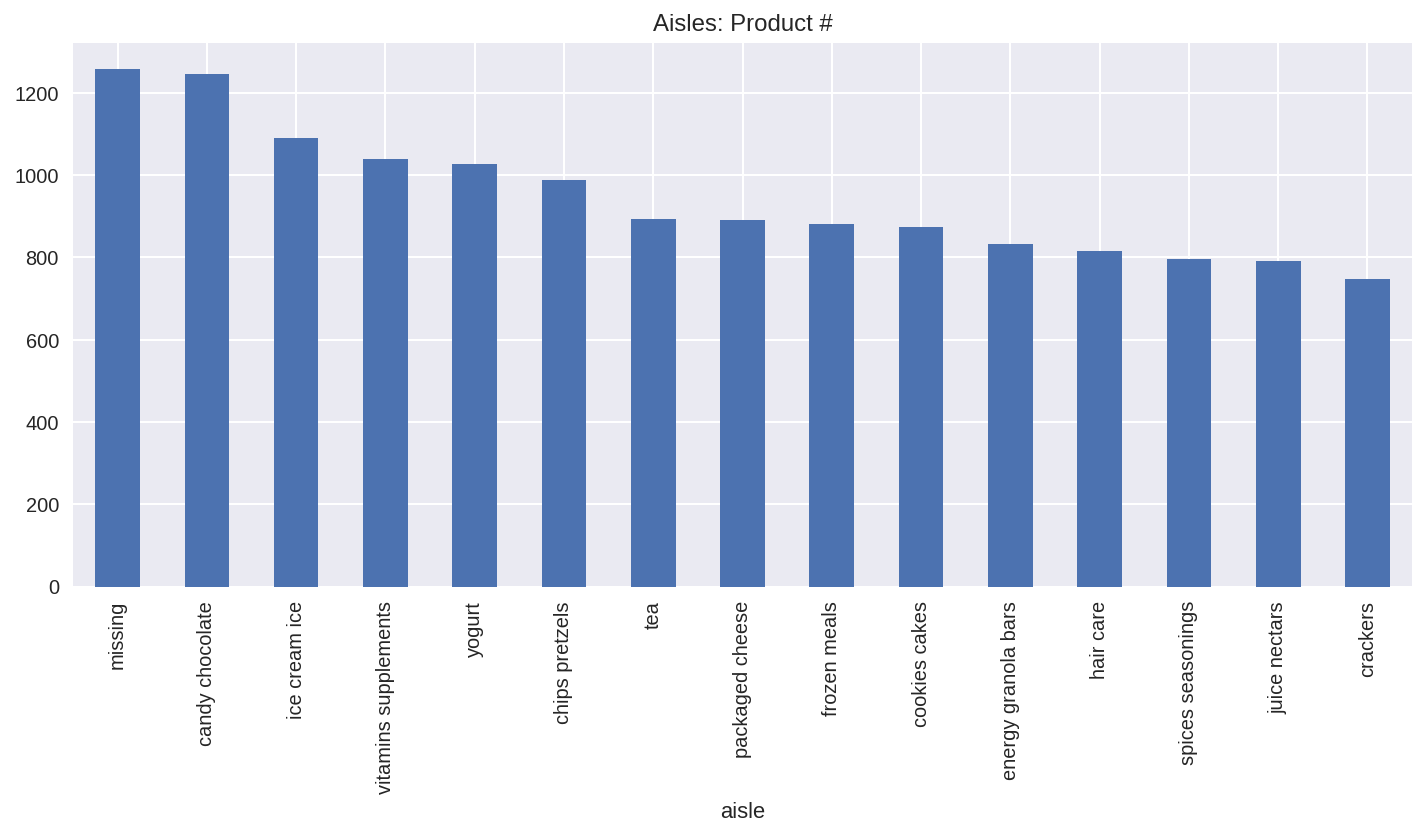

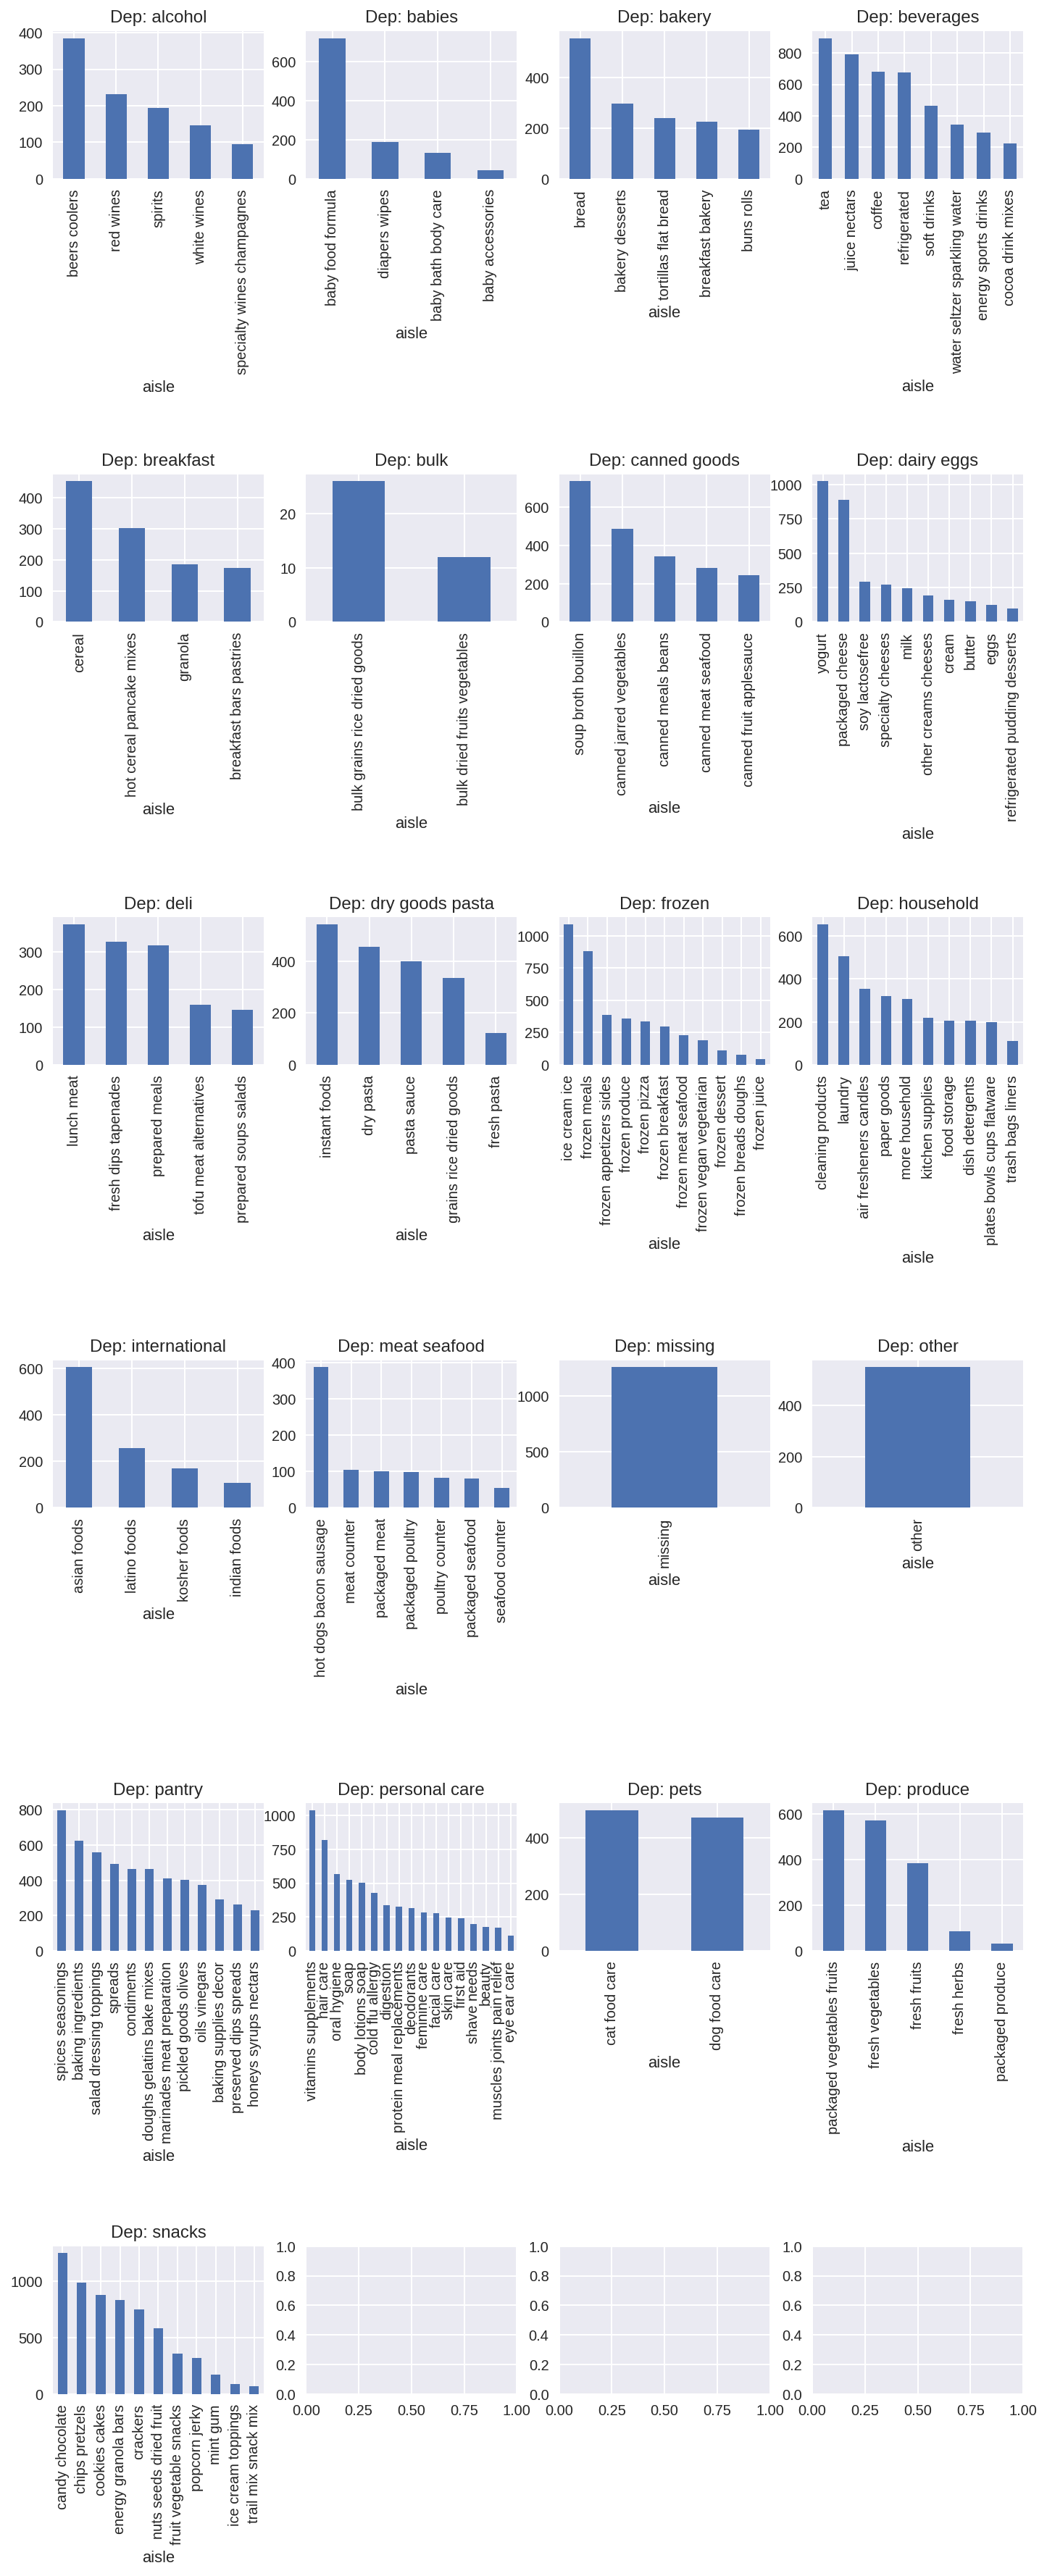

In [8]:
# basic group info (departments)

plt.figure(figsize=(24, 10))
# groupby() groups series according to department
# count() returns number of non-NA/null observations, we select product_id coloumn as it's counts will reflect unique products
# copy() makes a deep copy of current DataFrame / Series
# plot() creates a bar graph plot
goods.groupby(['department']).count()['product_id'].copy()\
.sort_values(ascending=False).plot(kind='bar', 
                                   #figsize=(12, 5), 
                                   title='Departments: Product #')


# basic group info (top-x aisles)
top_aisles_cnt = 15
plt.figure(figsize=(12, 5))
# we only look at top 15 aisle product counts
goods.groupby(['aisle']).count()['product_id']\
.sort_values(ascending=False)[:top_aisles_cnt].plot(kind='bar', 
                                   #figsize=(12, 5), 
                                   title='Aisles: Product #')

# plot departments volume, split by aisles
f, axarr = plt.subplots(6, 4, figsize=(12, 30))
# enumerate over departments in ascending order
for i,e in enumerate(departments.department.sort_values(ascending=True)):
    # access the axis object based on index and set title
    axarr[i//4, i%4].set_title('Dep: {}'.format(e))
    # plot goods grouped by all and count and assign to current axarr based on index.
    goods[goods.department==e].groupby(['aisle']).count()['product_id']\
    .sort_values(ascending=False).plot(kind='bar', ax=axarr[i//4, i%4])
f.subplots_adjust(hspace=2)

### Orders, prior, train, and sample submission previews:

In [9]:
print("orders.csv")
print('Total orders: {}'.format(orders.shape[0]))
orders.head(10)

orders.csv
Total orders: 3421083


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [10]:
print("order_products_prior.csv")
print('Total ordered products(prior): {}'.format(order_products_prior.shape[0]))
order_products_prior.head(10)

order_products_prior.csv
Total ordered products(prior): 32434489


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [11]:
print("order_products_train.csv")
print('Total ordered products(train): {}'.format(order_products_train.shape[0]))
order_products_prior.head(10)

order_products_train.csv
Total ordered products(train): 1384617


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [12]:
print("sample_submission.csv")
print('Total sample submission: {}'.format(sample_submission.shape[0]))
sample_submission.head(10)

sample_submission.csv
Total sample submission: 75000


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259
5,313,39276 29259
6,353,39276 29259
7,386,39276 29259
8,414,39276 29259
9,418,39276 29259


#### Combine (orders, order details, product hierarchy) into 1 dataframe order_details
(be careful, high memory consumption, about 3GB RAM itself)

In [13]:
from functools import partial

# merge train and prior together iteratively, to fit into 8GB kernel RAM
# split df indexes into parts
# linspace retrns evenly spaced numbers over a 
indexes = np.linspace(0, len(order_products_prior), num=10, dtype=np.int32)

# initialize it with train dataset
# Pandas merge function exposes database-like operations for combining DataFrames
# In this case, we are left inner joining orderS-products_train with
# orders on order_id.
# apply() applies a function on each column.
# the partial function apples the errors and downcast arguments prior to calling to_numeric on each value
order_details = pd.merge(
                left=order_products_train,
                 right=orders, 
                 how='left', 
                 on='order_id'
        ).apply(partial(pd.to_numeric, errors='ignore', downcast='integer'))

# add order hierarchy
order_details = pd.merge(
                left=order_details,
                right=goods[['product_id', 
                             'aisle_id', 
                             'department_id']].apply(partial(pd.to_numeric, 
                                                             errors='ignore', 
                                                             downcast='integer')),
                how='left',
                on='product_id'
)

print(order_details.shape, order_products_train.shape)

# delete (redundant now) dataframes
del order_products_train

order_details.head()

(1384617, 12) (1384617, 4)


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
0,1,49302,1,1,112108,train,4,4,10,9,120,16
1,1,11109,2,1,112108,train,4,4,10,9,108,16
2,1,10246,3,0,112108,train,4,4,10,9,83,4
3,1,49683,4,0,112108,train,4,4,10,9,83,4
4,1,43633,5,1,112108,train,4,4,10,9,95,15


In [14]:
%%time
# update by small portions
for i in range(len(indexes)-1):
    order_details = pd.concat(
        [   
            order_details,
            pd.merge(left=pd.merge(
                            left=order_products_prior.iloc[indexes[i]:indexes[i+1], :],
                            right=goods[[
                                'product_id', 
                                'aisle_id', 
                                'department_id'
                            ]].apply(partial(pd.to_numeric, 
                                             errors='ignore', 
                                             downcast='integer')),
                            how='left',
                            on='product_id'
                            ),
                     right=orders, 
                     how='left', 
                     on='order_id'
                )#.apply(partial(pd.to_numeric, errors='ignore', downcast='integer'))
        ]
    )
        
print('Datafame length: {}'.format(order_details.shape[0]))
print('Memory consumption: {:.2f} Mb'.format(sum(order_details.memory_usage(index=True, 
                                                                         deep=True) / 2**20)))
# check dtypes to see if we use memory effectively
print(order_details.dtypes)

# make sure we didn't forget to retain test dataset :D
test_orders = orders[orders.eval_set == 'test']

# delete (redundant now) dataframes
del order_products_prior, orders

Datafame length: 33819106
Memory consumption: 3096.23 Mb
add_to_cart_order           int16
aisle_id                    int16
days_since_prior_order    float16
department_id                int8
eval_set                   object
order_dow                    int8
order_hour_of_day            int8
order_id                    int32
order_number                int32
product_id                  int32
reordered                    int8
user_id                     int32
dtype: object
CPU times: user 19.2 s, sys: 1.36 s, total: 20.6 s
Wall time: 20.6 s


In [15]:
%%time
# unique orders, product_ordered, users
print('Unique users: {}'.format(len(set(order_details.user_id))))
print('Unique orders: {}'.format(len(set(order_details.order_id))))
print('Unique products bought: {}/{}'.format(len(set(order_details.product_id)), len(goods)))

Unique users: 206209
Unique orders: 3346083
Unique products bought: 49685/49688
CPU times: user 7.87 s, sys: 132 ms, total: 8 s
Wall time: 7.93 s


In [16]:
# unordered products

# isin() returns boolean DataFrame showering whether each element is contained in values 
unordered = goods[goods.product_id.isin(list(set(goods.product_id) - set(order_details.product_id)))]
print('"Lonesome" products cnt: {}/{}'.format(unordered.shape[0], len(goods)))
unordered.head()

"Lonesome" products cnt: 3/49688


,product_id,product_name,aisle_id,department_id,department,aisle
3629,3630,protein_granola_apple_crisp,57,14,breakfast,granola
7044,7045,unpeeled_apricot_halves_in_heavy_syrup,88,13,pantry,spreads
46624,46625,single_barrel_kentucky_straight_bourbon_whiskey,31,7,beverages,refrigerated


## Most Popular Products

CPU times: user 6.76 s, sys: 276 ms, total: 7.04 s
Wall time: 7.03 s


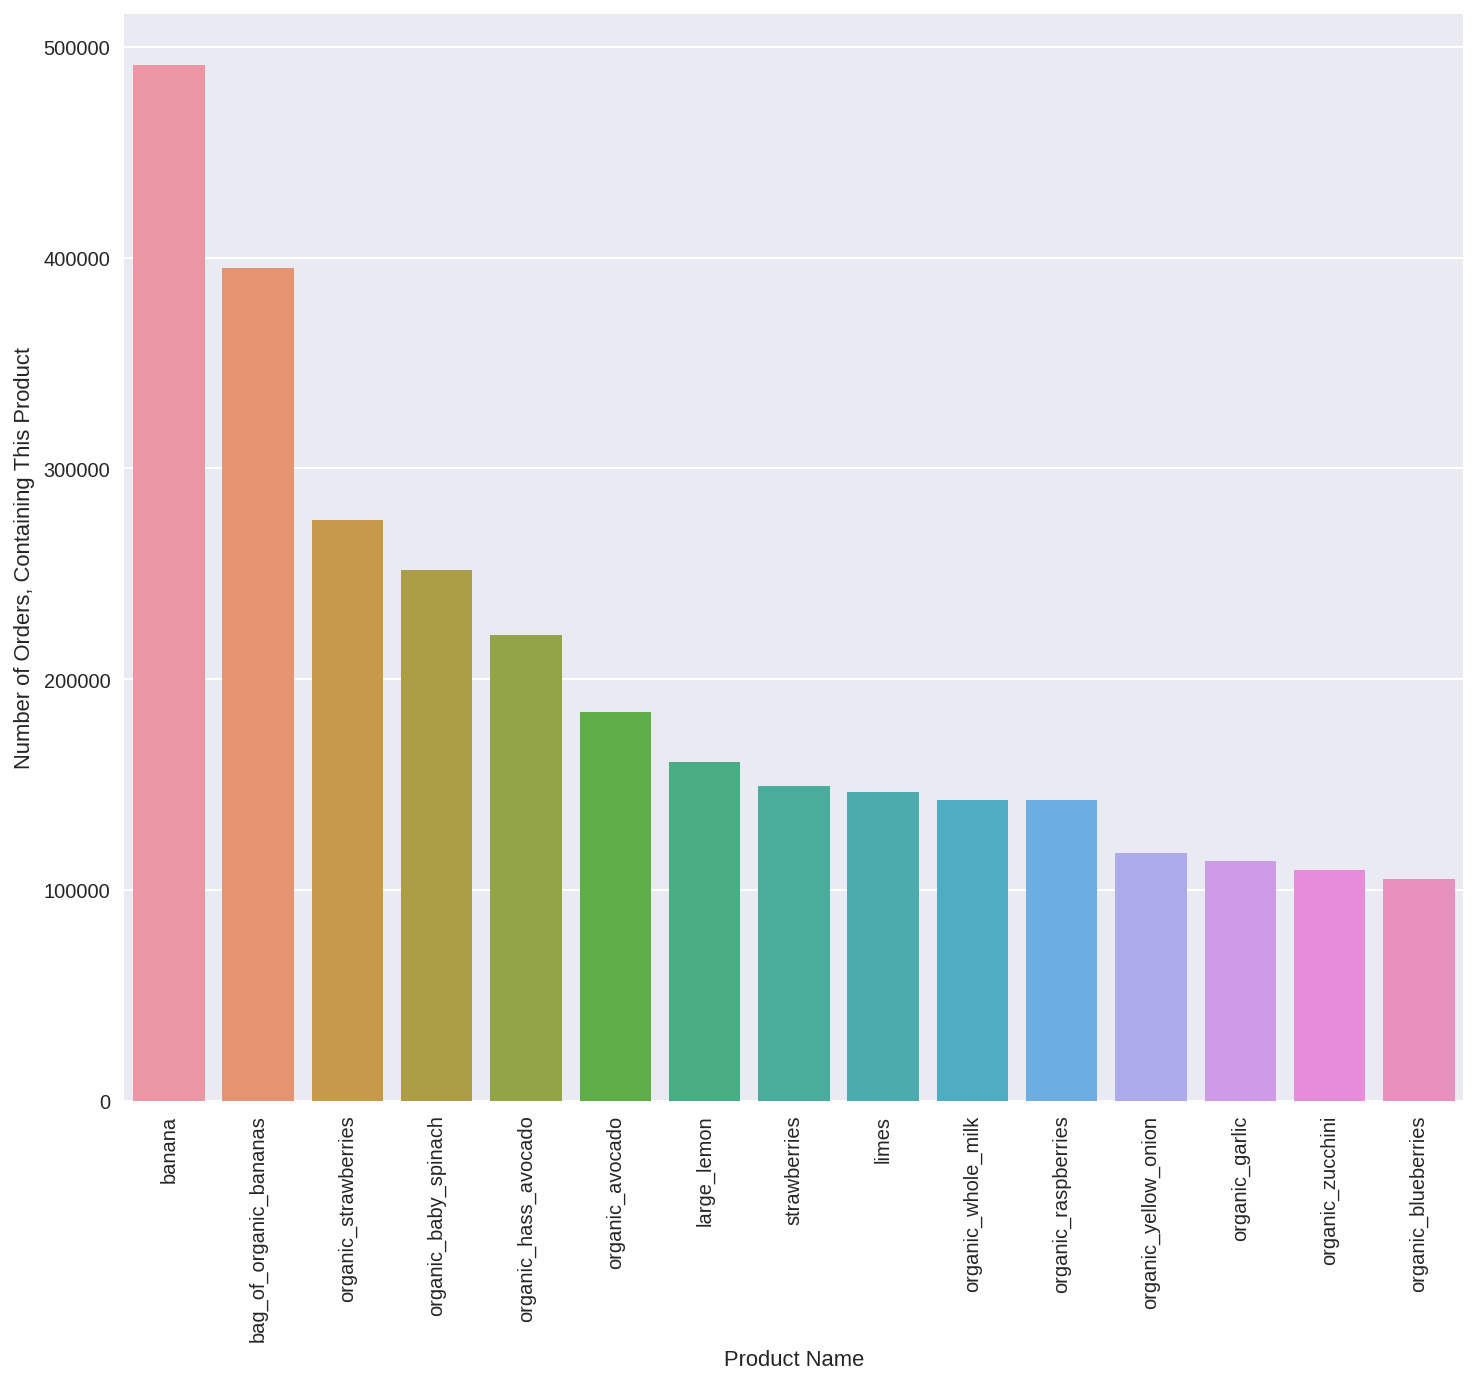

In [17]:
%%time
# popular products (total set, not only train)
top = 15


top_products = pd.merge(
    # to see train: 
    # left=pd.DataFrame(order_details[order_details.eval_set == 'train'].groupby(['product_id'])['order_id']\
    left=pd.DataFrame(order_details.groupby(['product_id'])['order_id']\
    .apply(lambda x: len(x.unique())).sort_values(ascending=False)[:top].reset_index()),
    right=goods,
    how='left')

f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(top_products.product_name, top_products.order_id)
plt.ylabel('Number of Orders, Containing This Product')
plt.xlabel('Product Name')

## Most frequently Purchased Product

CPU times: user 3.56 s, sys: 356 ms, total: 3.92 s
Wall time: 3.92 s


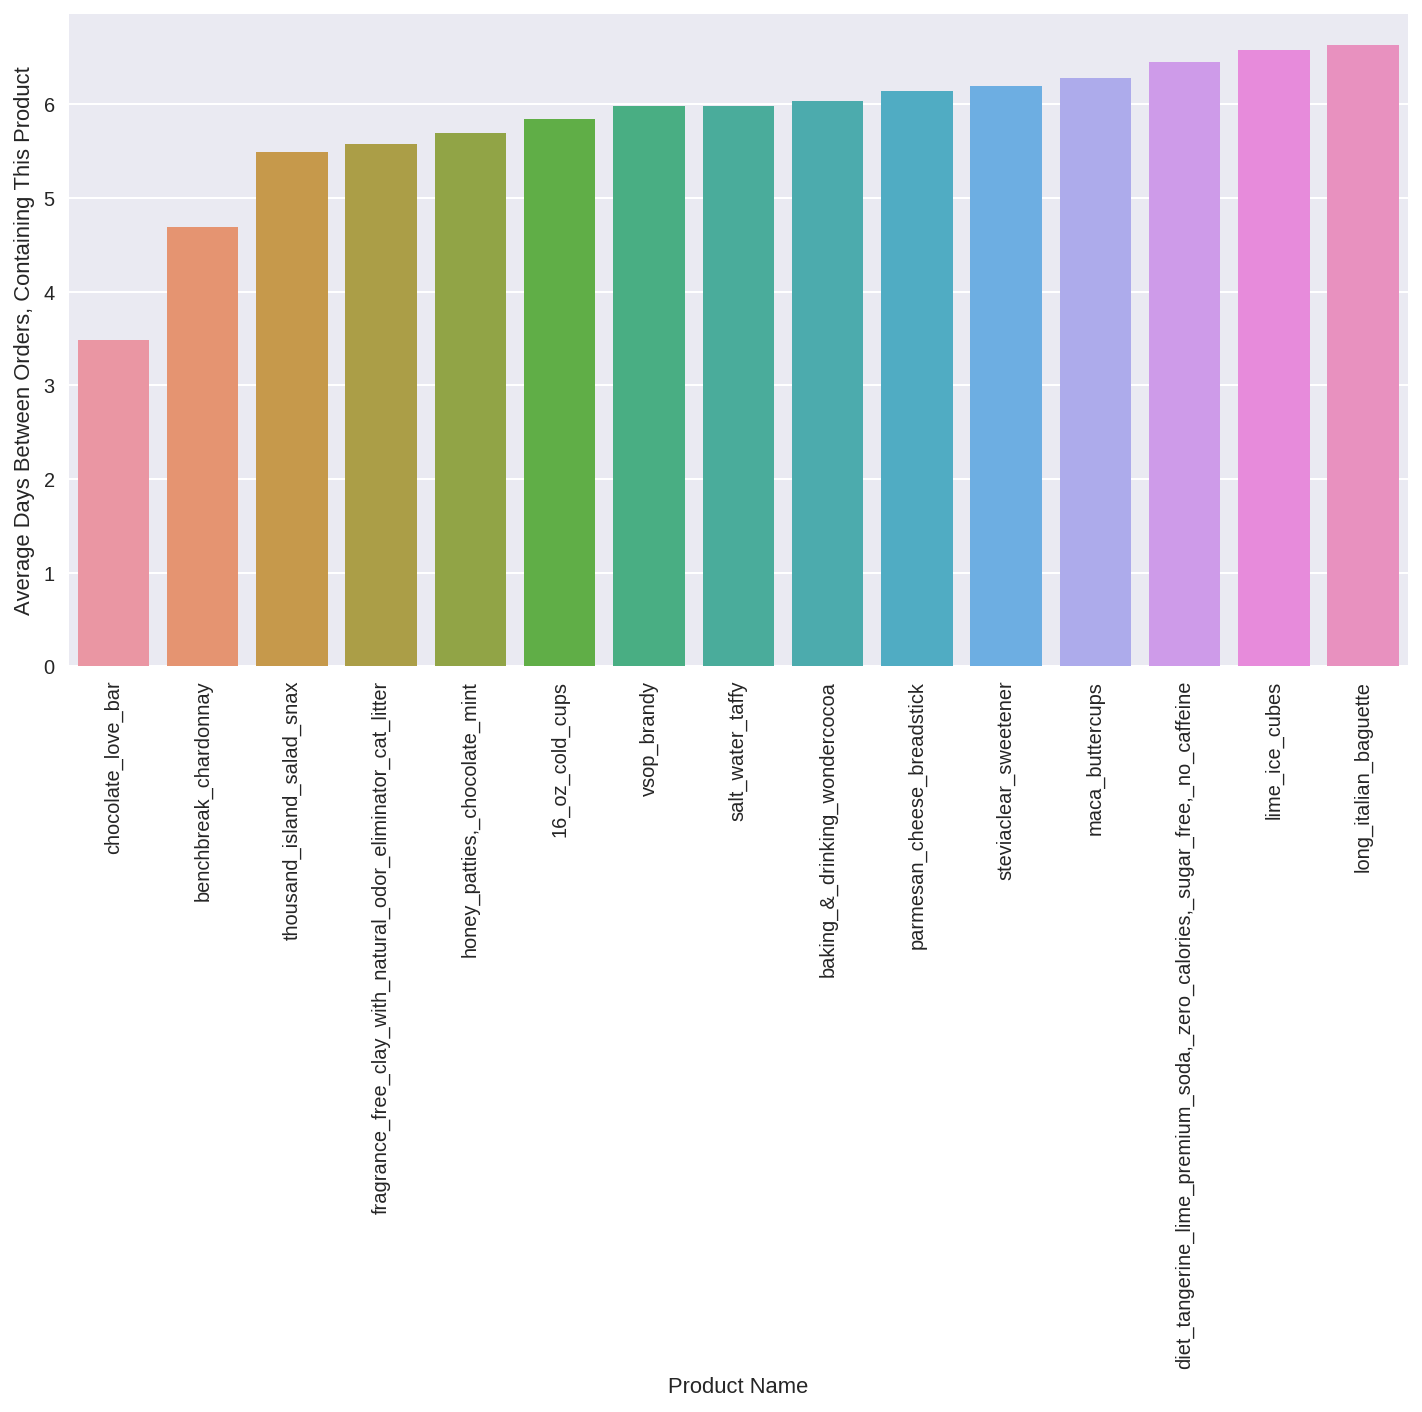

In [54]:
%%time
# most "frequently" bought products (total set, not only train)
# most "frequently" ~ time between orders (within selected customer's orders), 
# that contain that product, is the least 
#(products, which were bought by more than 100 customers, to omit outliers)
top = 15
customer_limit = 100

## select two coloumns, aggregate results 
# aggregate() uses the callables on each item and creates new rows based on the
#  labels of the names, in this case mean of days_since_prior_order and length of user_id which
# starts as a list of user_id's via the groupby() statement. This equates to number of purchasers.
temp = order_details.groupby(['product_id'])[['days_since_prior_order', 'user_id']]\
.aggregate({'days_since_prior_order': np.mean, 'user_id': len}).reset_index()

# join goods on product_id and sort based on days_since_prior_order and take the top 15
frequent_products = pd.merge(
    left=pd.DataFrame(temp[temp.user_id > customer_limit].sort_values(['days_since_prior_order'], 
                                                                      ascending=True)[:top]),
    right=goods,
    how='left')

plt.figure(figsize=(12,6))
plt.xticks(rotation='vertical')
sns.barplot(frequent_products.product_name, frequent_products.days_since_prior_order)
plt.ylabel('Average Days Between Orders, Containing This Product')
plt.xlabel('Product Name')

del temp

### Orders, Split by Product Count

Most common order contains: 5 products
CPU times: user 1.67 s, sys: 176 ms, total: 1.84 s
Wall time: 1.84 s


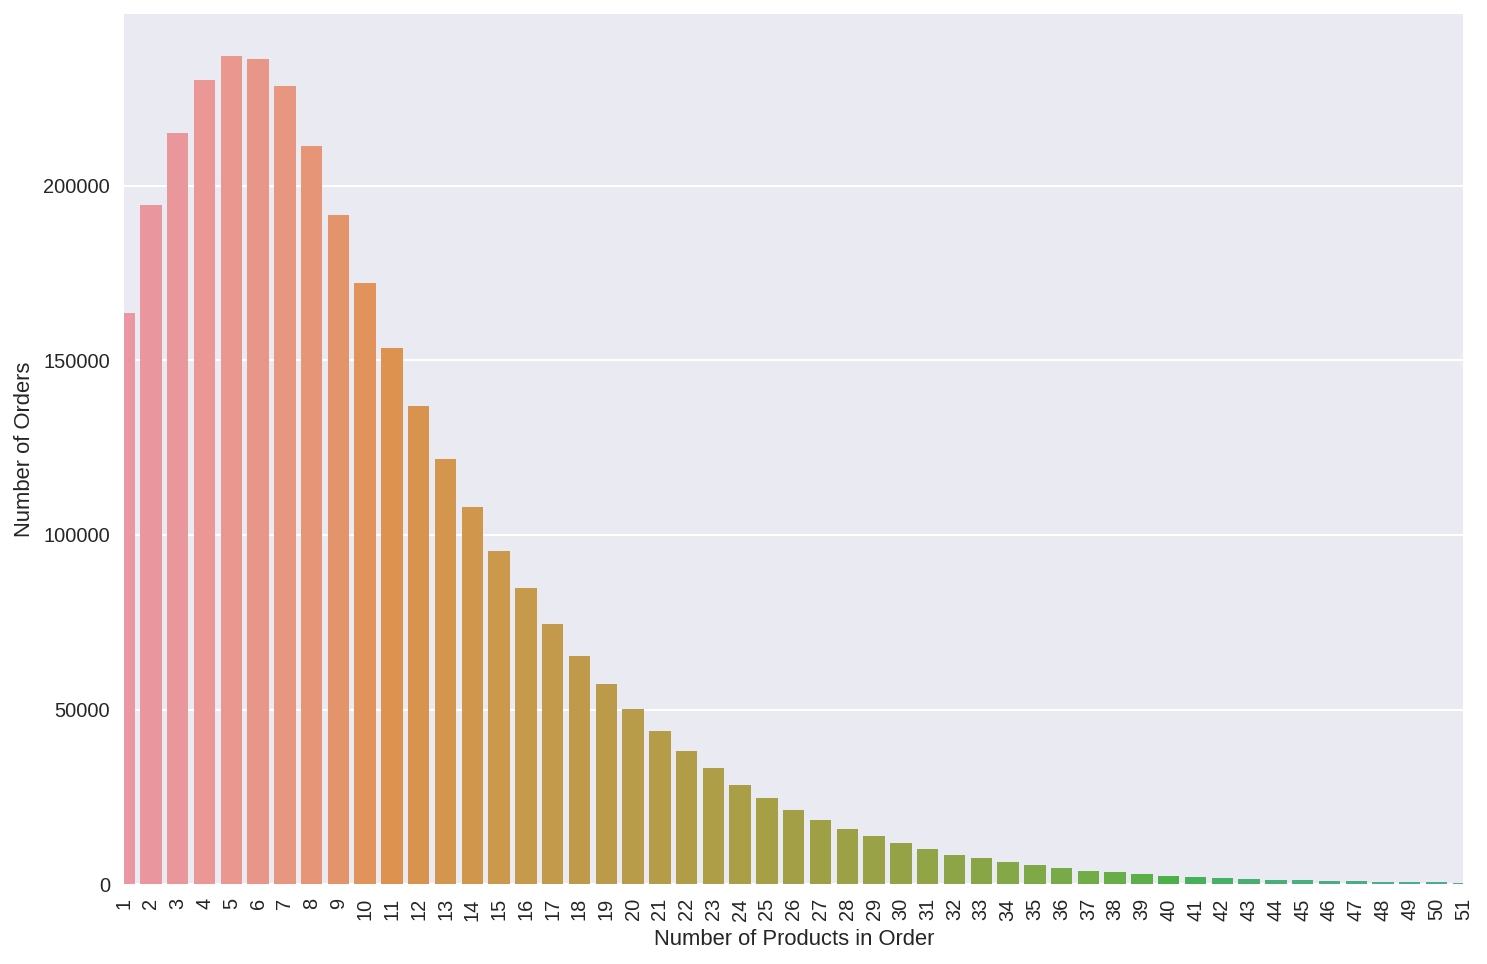

In [58]:
%%time

# obtain the the max add_to_cart_order of the groupby order_id. This gives the number of items in the order.
ord_by_prods = order_details.groupby("order_id")["add_to_cart_order"]\
.aggregate(np.max).reset_index()['add_to_cart_order'].value_counts()

print('Most common order contains: {} products'.format(
    ord_by_prods[ord_by_prods.values == ord_by_prods.max()].index.values[0]))

# plot it
plt.figure(figsize=(12, 8))
plt.xticks(rotation='vertical')
sns.barplot(ord_by_prods.index, ord_by_prods.values)
plt.ylabel('Number of Orders')
plt.xlabel('Number of Products in Order')
plt.xlim([0, 50])
pass

### Products with the highest reorder rate

CPU times: user 3.3 s, sys: 340 ms, total: 3.64 s
Wall time: 3.64 s


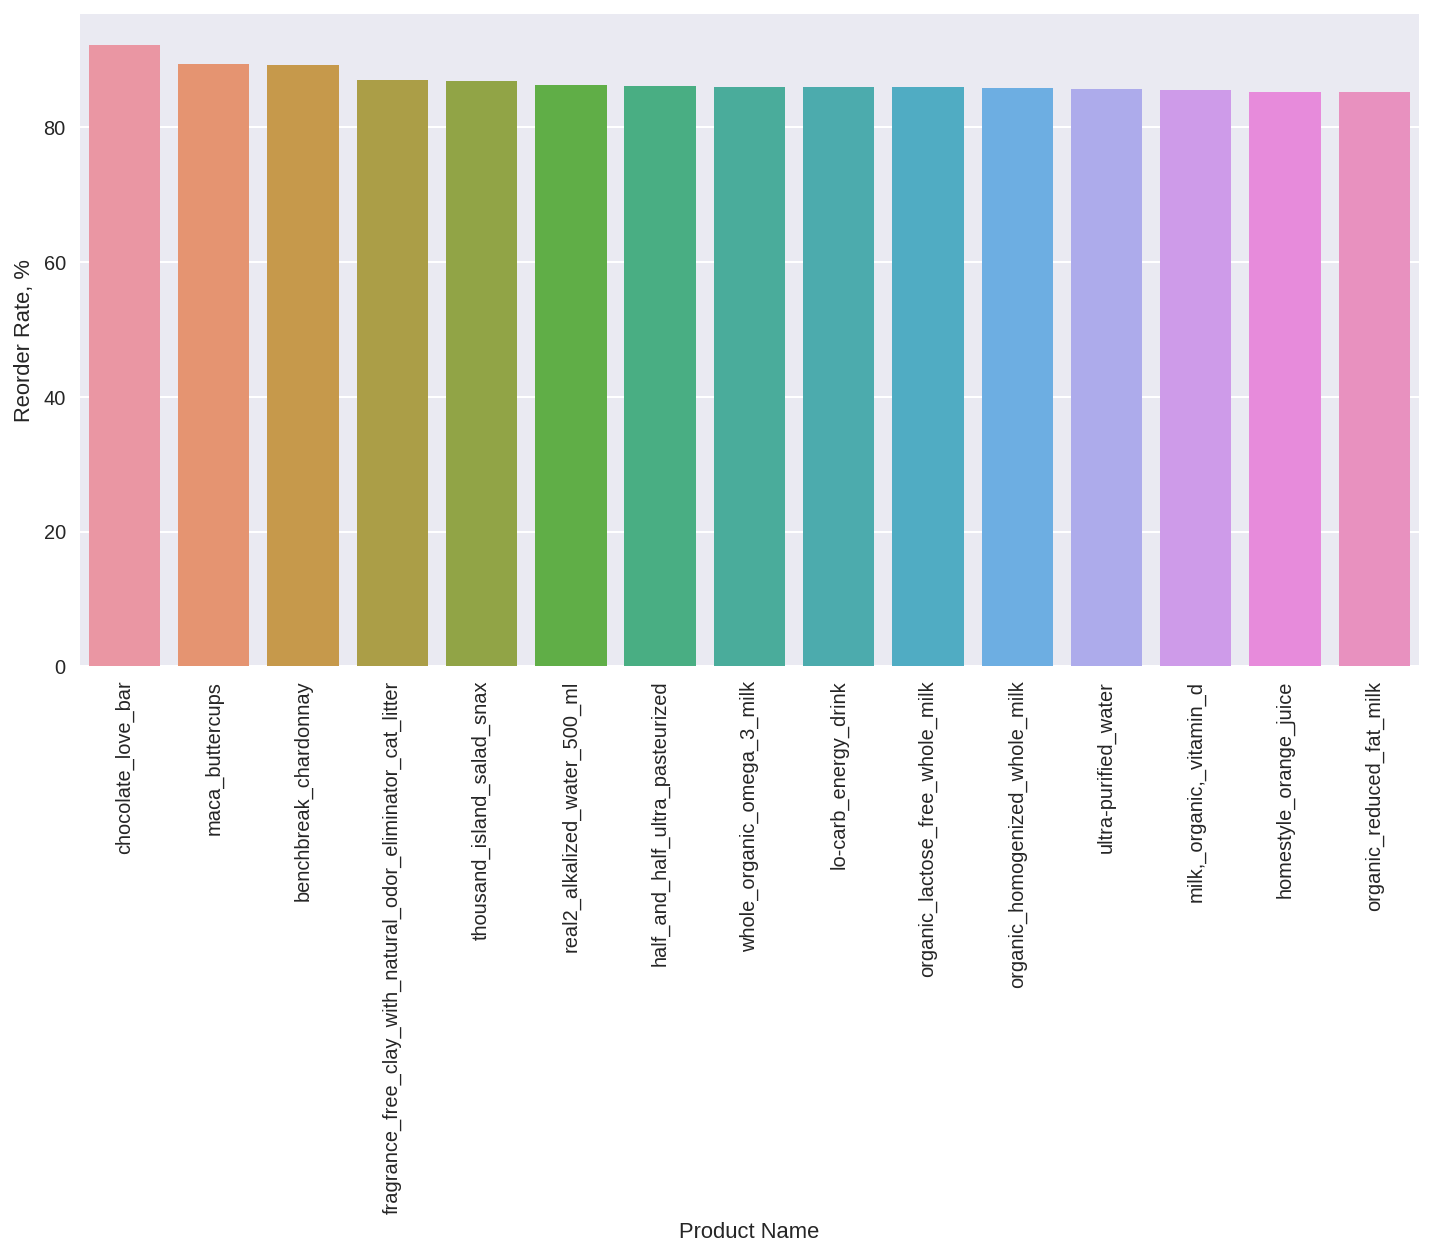

In [77]:
%%time
# consider products, purchased in more than X orders
order_limit = 100
top = 15

# group order details by product_id and aggregate sum of reordered and len order_id (results in order count)
mo_products = order_details.groupby('product_id')[['reordered', 'order_id']]\
.aggregate({'reordered': sum, 'order_id': len}).reset_index()

# rename order_id to order_cnt to reflect meaning of aggregate values
mo_products.rename(columns = {'order_id':'order_cnt'}, inplace = True)

# calculate the reorder ratio
mo_products['reorder_rate'] = mo_products['reordered'] / mo_products['order_cnt']

# grab only entries with order count greater than the limit and grap the top 15
mo_products = mo_products[mo_products.order_cnt > order_limit].sort_values(['reorder_rate'], 
                                                                           ascending=False)[:top]
# merge with goods
mo_products = pd.merge(
    left=mo_products,
    right=goods,
    on='product_id')
mo_products

# plot it
plt.figure(figsize=(12, 6))
plt.xticks(rotation='vertical')
sns.barplot(mo_products.product_name, mo_products.reorder_rate*100)
plt.ylabel('Reorder Rate, %')
plt.xlabel('Product Name')
pass

### Orders by Day of Week

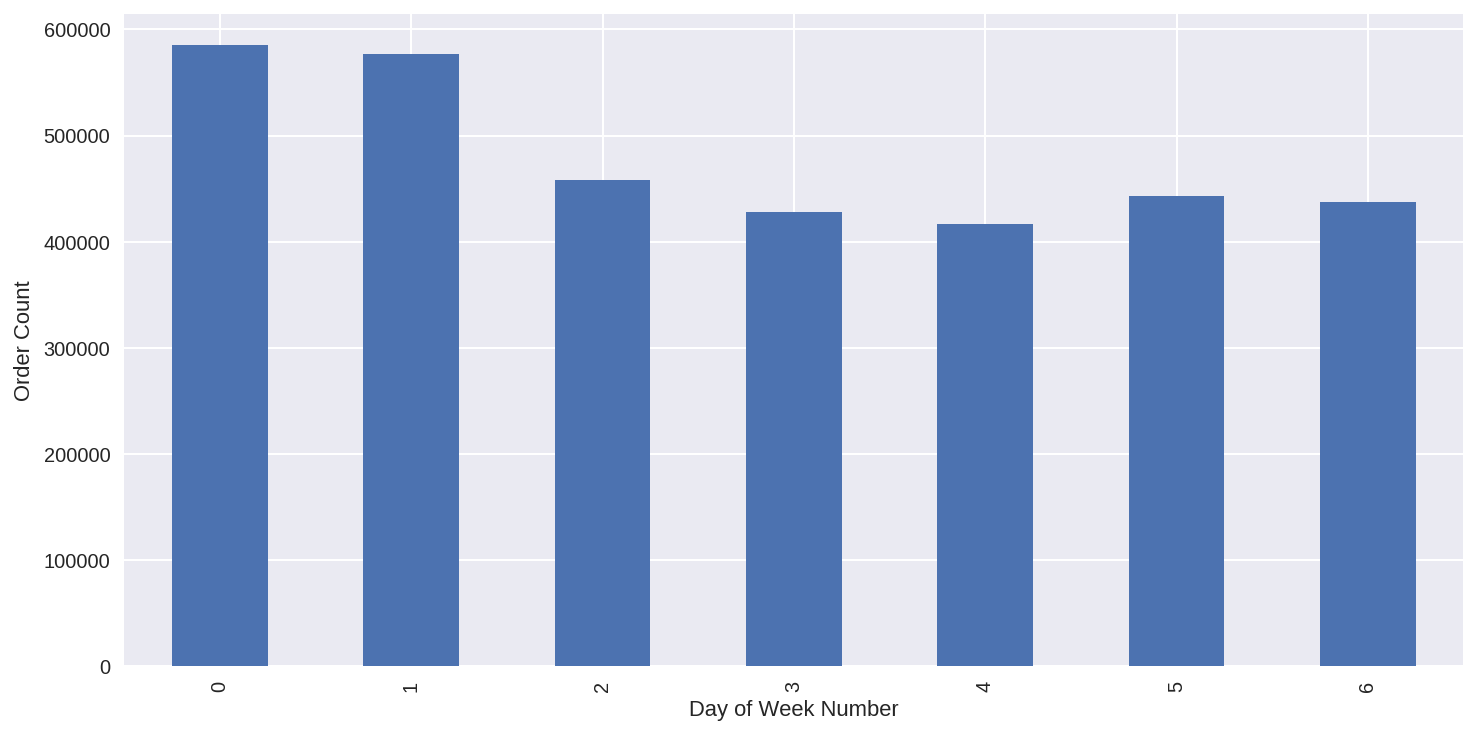

In [67]:
plt.figure(figsize=(12,6))
order_details.groupby('order_dow')['order_id'].apply(lambda x: len(x.unique())).plot(kind='bar')
plt.xticks(rotation='vertical')
plt.ylabel('Order Count')
plt.xlabel('Day of Week Number')

### Orders, split by hours 

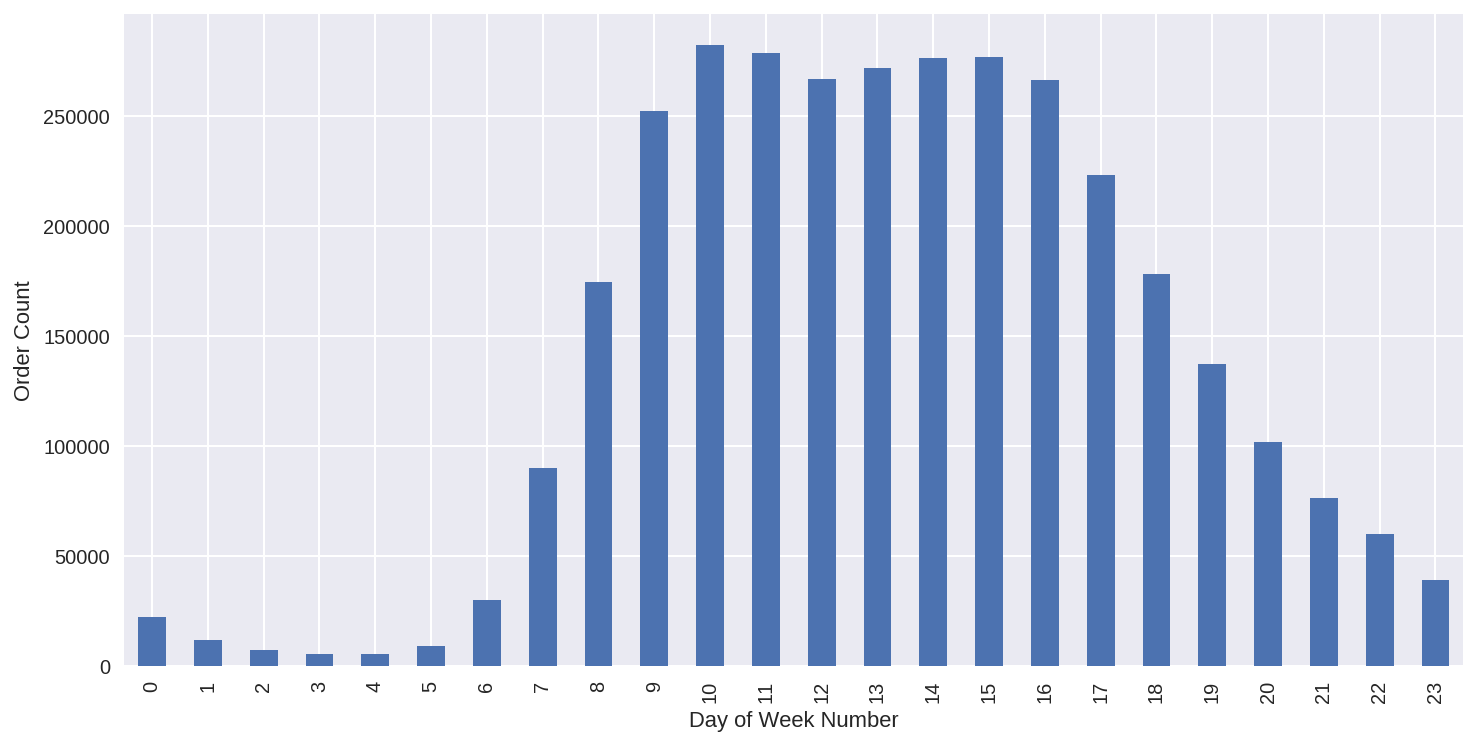

In [70]:
plt.figure(figsize=(12,6))
order_details.groupby('order_hour_of_day')['order_id'].apply(lambda x: len(x.unique())).plot(kind='bar')
plt.xticks(rotation='vertical')
plt.ylabel('Order Count')
plt.xlabel('Day of Week Number')

### Most Popular Departments

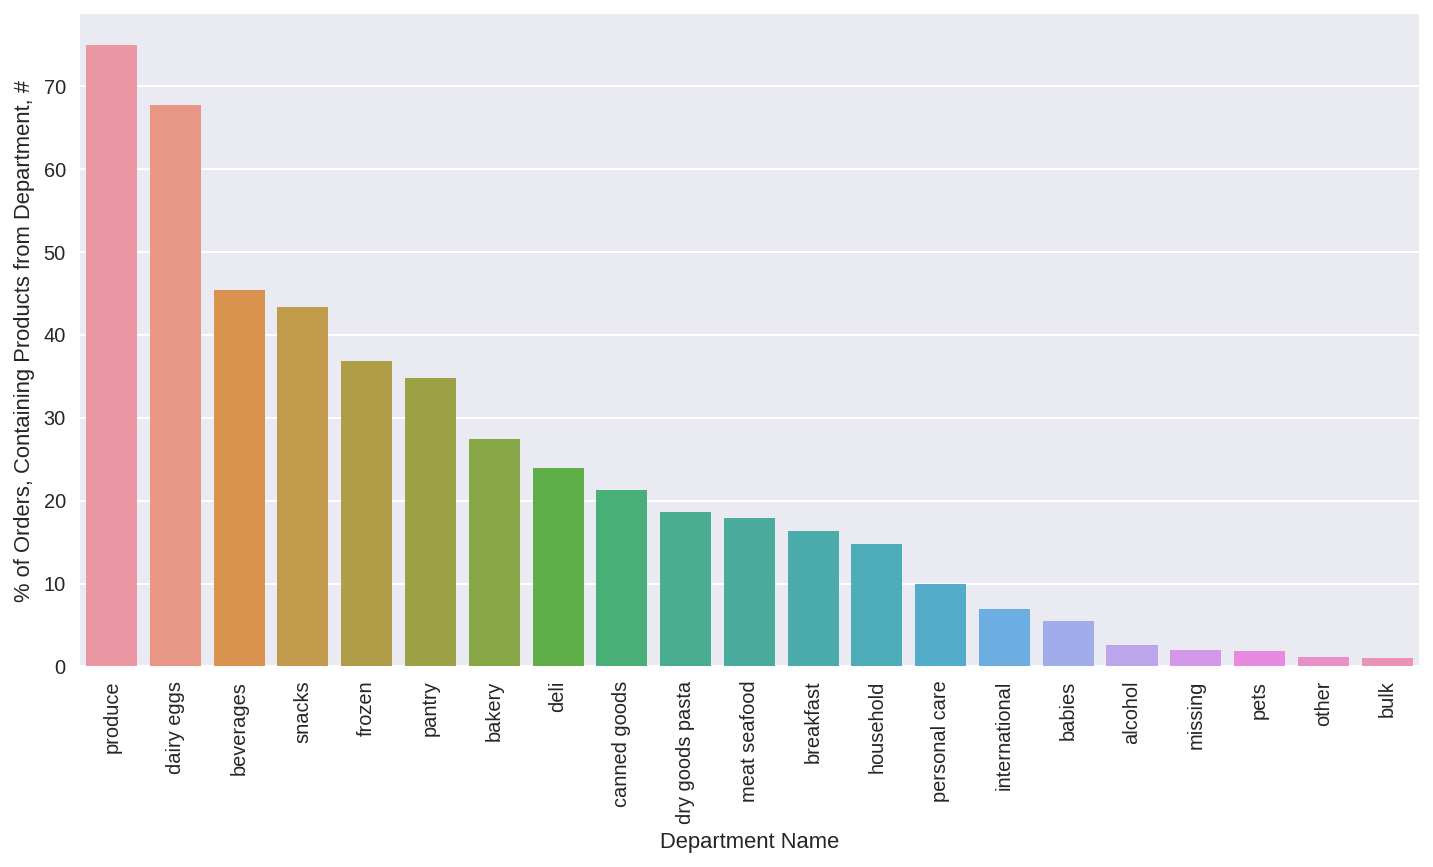

In [109]:
popular_departments = pd.merge(
    left= pd.DataFrame(order_details.groupby('department_id')['order_id'].apply(lambda x: len(x.unique())).reset_index()), 
    right=goods[['department', 'department_id']].drop_duplicates(),
    how='inner',
    on='department_id').sort_values(['order_id'], ascending=False)

# rename
popular_departments.rename(columns = {'order_id':'order_cnt'}, inplace = True)

# get the total number of orders for calculating the ratio of orders/department to total orders
total_orders = len(set(order_details.order_id))

plt.figure(figsize=(12,6))
plt.xticks(rotation='vertical')
sns.barplot(popular_departments.department, popular_departments.order_cnt / total_orders * 100)
plt.ylabel('% of Orders, Containing Products from Department, #')
plt.xlabel('Department Name')
pass


### Most popular aisles

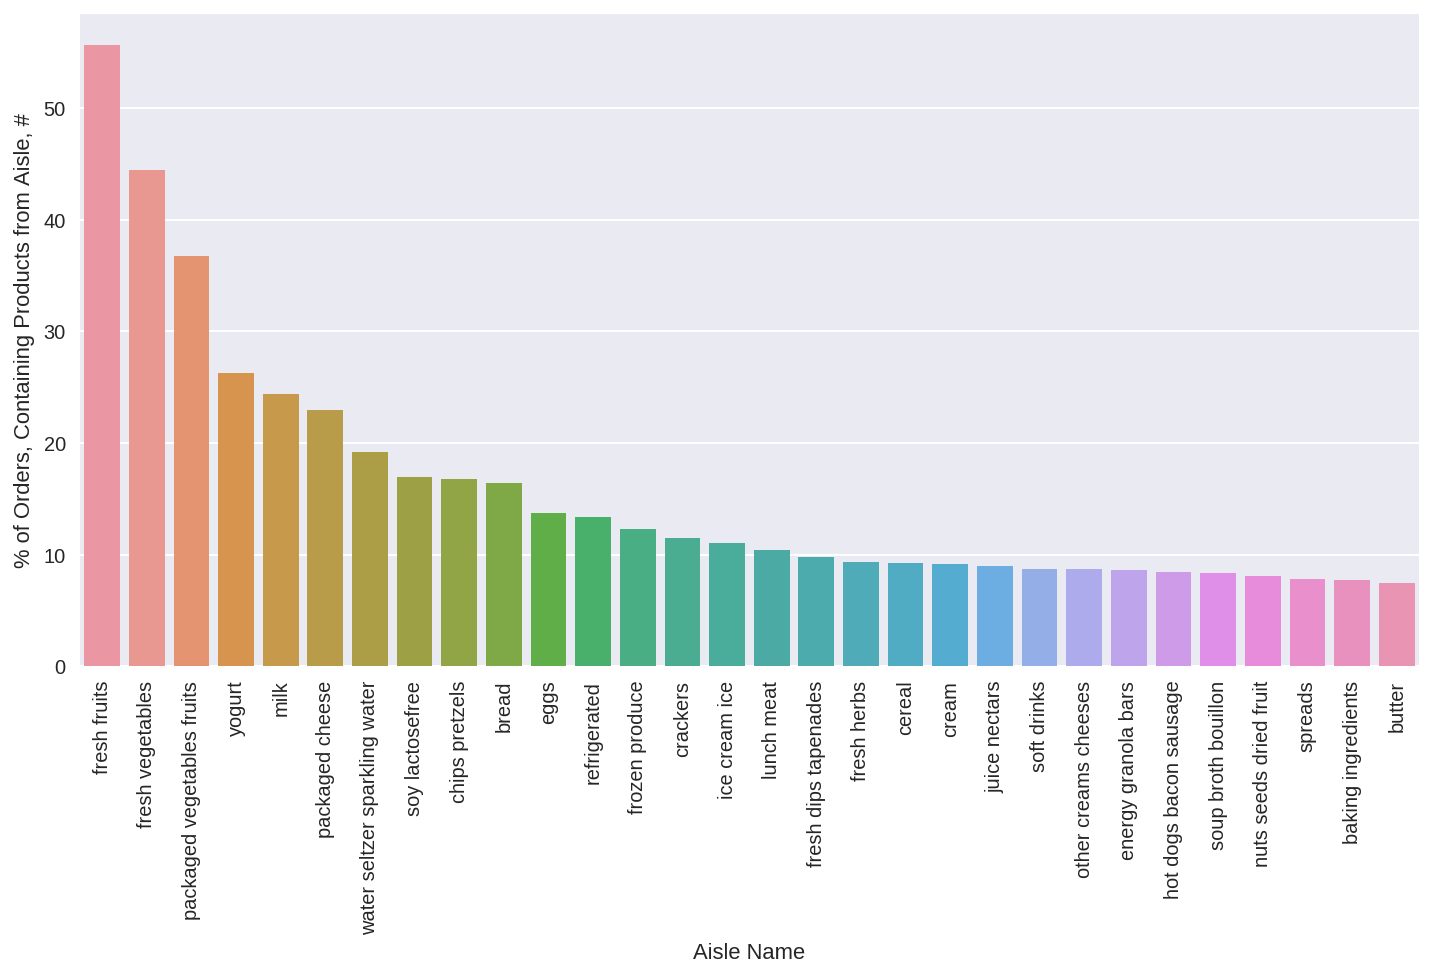

In [112]:
top = 30

popular_aisles = pd.merge(
    left= pd.DataFrame(order_details.groupby('aisle_id')['order_id'].apply(lambda x: len(x.unique())).reset_index()), 
    right=goods[['aisle_id', 'aisle']].drop_duplicates(),
    how='inner',
    on='aisle_id').sort_values(['order_id'], ascending=False)[:top]

# rename
popular_aisles.rename(columns = {'order_id':'order_cnt'}, inplace = True)

# get the total number of orders for calculating the ratio of orders/department to total orders
total_orders = len(set(order_details.order_id))

plt.figure(figsize=(12,6))
plt.xticks(rotation='vertical')
sns.barplot(popular_aisles.aisle, popular_aisles.order_cnt / total_orders * 100)
plt.ylabel('% of Orders, Containing Products from Aisle, #')
plt.xlabel('Aisle Name')
pass